In [42]:
# importing
import pandas as pd
import numpy as np

## READING ALL TEH DATA FILES

In [65]:
cust_data=pd.read_excel('Customers_31JAN2019.xlsx')
test_foreclosure=pd.read_csv('test_foreclosure.csv')
train_foreclosure=pd.read_csv('train_foreclosure.csv')
#data=pd.read_excel(r"C:\Users\jubin\OneDrive\Desktop\SIP (Vitti Ai)\Loan Prepayment\Data Sample Shared\LMS_31JAN2019.xlsx")

### MOVING TO CUSTOMER DATA DATASET

<Axes: >

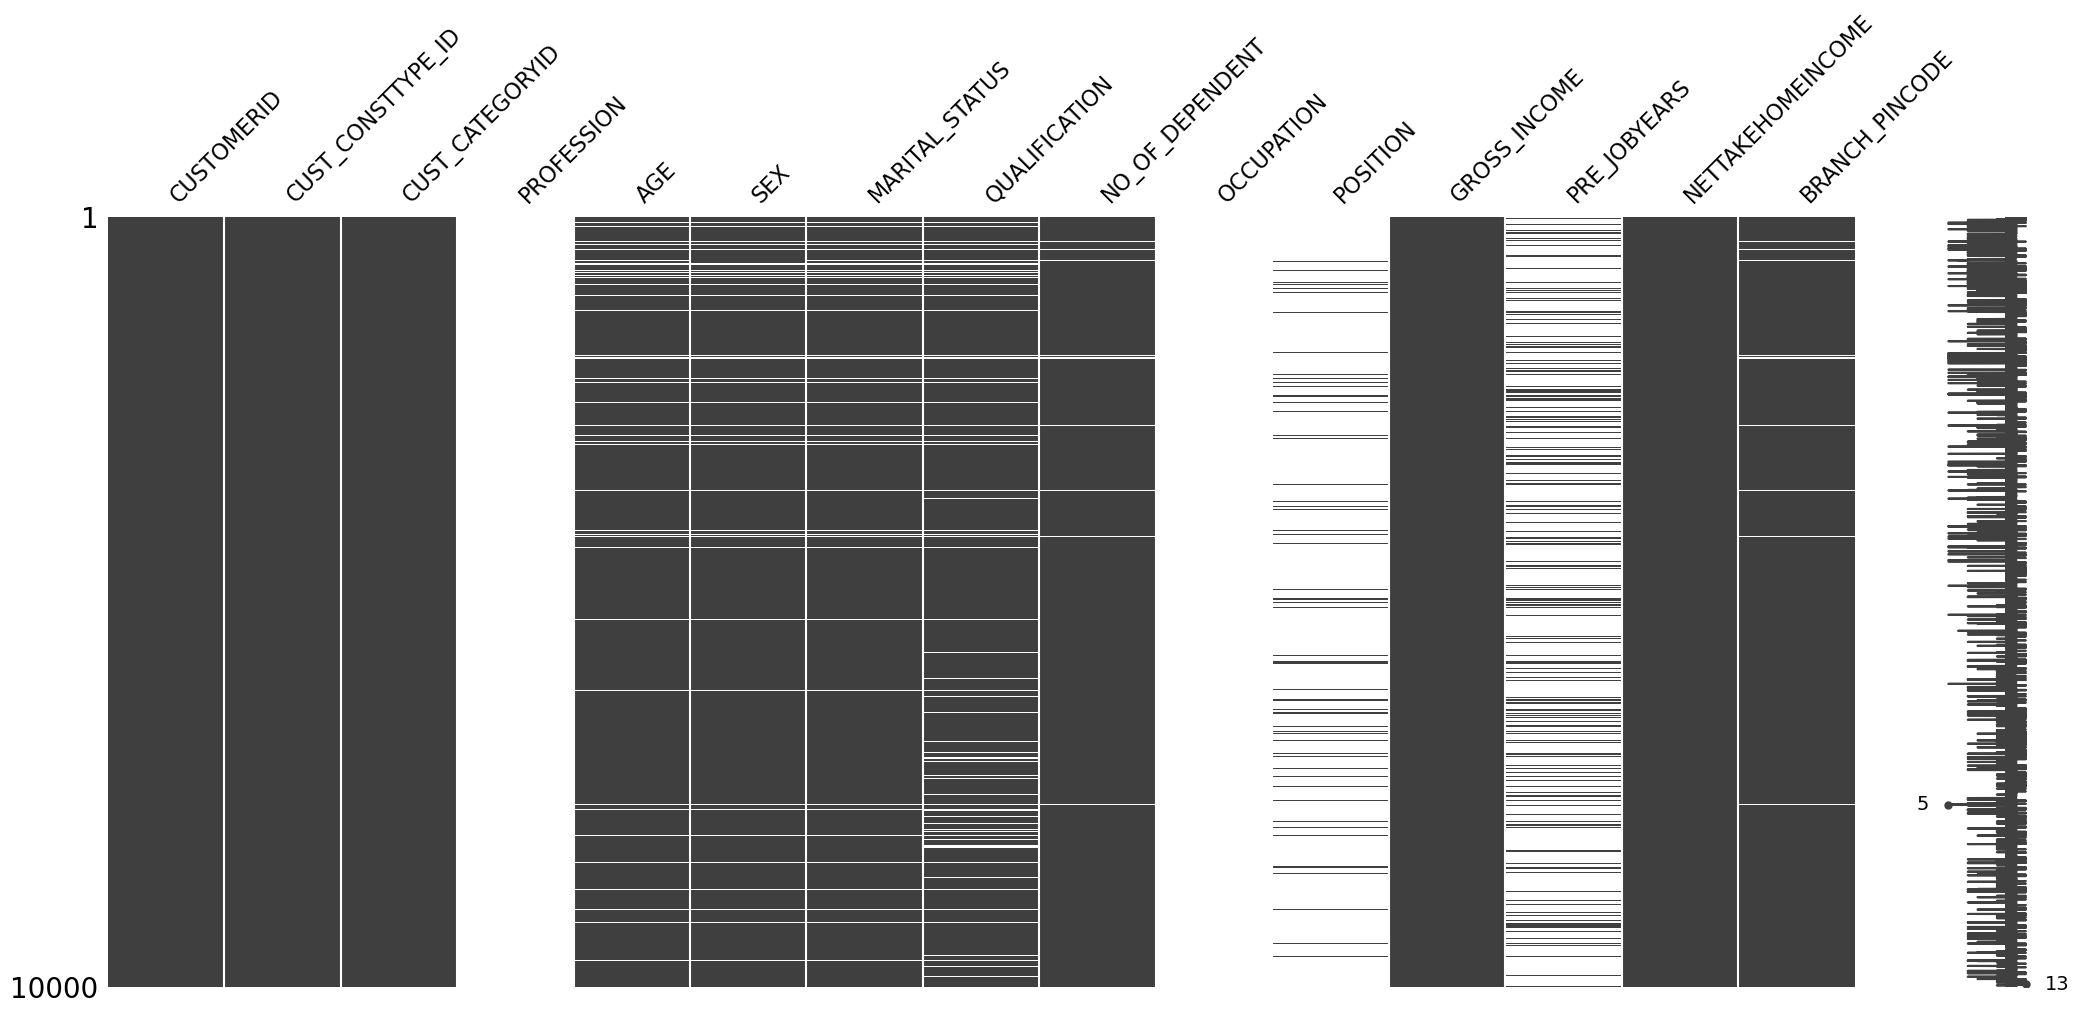

In [66]:
import missingno as msno
msno.matrix(cust_data)

In [44]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUSTOMERID         10000 non-null  int64  
 1   CUST_CONSTTYPE_ID  10000 non-null  int64  
 2   CUST_CATEGORYID    10000 non-null  int64  
 3   PROFESSION         0 non-null      float64
 4   AGE                9604 non-null   float64
 5   SEX                9606 non-null   object 
 6   MARITAL_STATUS     9604 non-null   object 
 7   QUALIFICATION      9397 non-null   object 
 8   NO_OF_DEPENDENT    9921 non-null   float64
 9   OCCUPATION         0 non-null      float64
 10  POSITION           661 non-null    object 
 11  GROSS_INCOME       10000 non-null  float64
 12  PRE_JOBYEARS       2375 non-null   float64
 13  NETTAKEHOMEINCOME  10000 non-null  float64
 14  BRANCH_PINCODE     9927 non-null   float64
dtypes: float64(8), int64(3), object(4)
memory usage: 1.1+ MB


In [45]:
#getting a count of null values
cust_data.isnull().sum()

CUSTOMERID               0
CUST_CONSTTYPE_ID        0
CUST_CATEGORYID          0
PROFESSION           10000
AGE                    396
SEX                    394
MARITAL_STATUS         396
QUALIFICATION          603
NO_OF_DEPENDENT         79
OCCUPATION           10000
POSITION              9339
GROSS_INCOME             0
PRE_JOBYEARS          7625
NETTAKEHOMEINCOME        0
BRANCH_PINCODE          73
dtype: int64

In [46]:
#dropping the columns occupation, profession, position and prejobyears since they contain too many null values
cust_data.drop(columns=['PROFESSION','OCCUPATION','POSITION','PRE_JOBYEARS'],inplace=True)

In [47]:
#getting a count of null values
cust_data.isnull().sum()

CUSTOMERID             0
CUST_CONSTTYPE_ID      0
CUST_CATEGORYID        0
AGE                  396
SEX                  394
MARITAL_STATUS       396
QUALIFICATION        603
NO_OF_DEPENDENT       79
GROSS_INCOME           0
NETTAKEHOMEINCOME      0
BRANCH_PINCODE        73
dtype: int64

In [48]:
#three categorical columns have null values sex, marital status and qualification,
#since they are categorical we will use the mode inputation 
def cat_imputer(df,lis_cols):
    for x in lis_cols:
        mode=df[x].mode()[0]
        df[x].fillna(mode,inplace=True)
#imputing the null
cat_imputer(cust_data,['SEX', 'MARITAL_STATUS', 'QUALIFICATION'])

In [49]:
#three continuos columns have null values like age and number of dependents
#since they are continuos we will use the mean inputation 
def num_imputer(df,lis_cols):
    for x in lis_cols:
        mean=round(df[x].mean())
        df[x].fillna(mean,inplace=True)
#imputing the null
cat_imputer(cust_data,['NO_OF_DEPENDENT', 'AGE'])

In [50]:
#getting a count of null values
cust_data.isnull().sum()

CUSTOMERID            0
CUST_CONSTTYPE_ID     0
CUST_CATEGORYID       0
AGE                   0
SEX                   0
MARITAL_STATUS        0
QUALIFICATION         0
NO_OF_DEPENDENT       0
GROSS_INCOME          0
NETTAKEHOMEINCOME     0
BRANCH_PINCODE       73
dtype: int64

In [51]:
#since we have already lost a lot of data and Branch Pincode has 2 irregilarites 
#first ebing the null values and seconf being the 0 as branch pincode
#for both we will use mode imputaion
mode=cust_data['BRANCH_PINCODE'].mode()[0]
cust_data['BRANCH_PINCODE'].replace(0,mode,inplace=True)
cat_imputer(cust_data,['BRANCH_PINCODE'])

In [52]:
#with respect to the pincode 
#changing it to int first
cust_data.BRANCH_PINCODE=cust_data.BRANCH_PINCODE.astype('int64')

### MOVING TO TRAIN FORECLOSURE DATASET

In [55]:
train_foreclosure.info()
#there are no null values we can move ahead

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   AGREEMENTID  20012 non-null  int64
 1   FORECLOSURE  20012 non-null  int64
dtypes: int64(2)
memory usage: 312.8 KB


### CUSTOMER LMS DATA

In [58]:
data.info()
#looking at the data info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624250 entries, 0 to 624249
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   AGREEMENTID            624250 non-null  int64         
 1   CUSTOMERID             623734 non-null  float64       
 2   LOAN_AMT               624250 non-null  float64       
 3   NET_DISBURSED_AMT      624250 non-null  float64       
 4   INTEREST_START_DATE    624250 non-null  datetime64[ns]
 5   CURRENT_ROI            624250 non-null  float64       
 6   ORIGNAL_ROI            624250 non-null  float64       
 7   CURRENT_TENOR          624245 non-null  float64       
 8   ORIGNAL_TENOR          624250 non-null  int64         
 9   DUEDAY                 624250 non-null  int64         
 10  AUTHORIZATIONDATE      624250 non-null  datetime64[ns]
 11  CITY                   624242 non-null  object        
 12  PRE_EMI_DUEAMT         624250 non-null  floa

In [60]:
#chceking the number of null values
data.isnull().sum()
#Customer ID  and Agreement ID has to be used a primary key so we leave it as it is
#since NPA and NPA _ Last month wont be suitable for imputation 
#we will drop these once we make a single data set

AGREEMENTID                   0
CUSTOMERID                  516
LOAN_AMT                      0
NET_DISBURSED_AMT             0
INTEREST_START_DATE           0
CURRENT_ROI                   0
ORIGNAL_ROI                   0
CURRENT_TENOR                 5
ORIGNAL_TENOR                 0
DUEDAY                        0
AUTHORIZATIONDATE             0
CITY                          8
PRE_EMI_DUEAMT                0
PRE_EMI_RECEIVED_AMT          0
PRE_EMI_OS_AMOUNT             0
EMI_DUEAMT                    0
EMI_RECEIVED_AMT              0
EMI_OS_AMOUNT                 0
EXCESS_AVAILABLE              0
EXCESS_ADJUSTED_AMT           0
BALANCE_EXCESS                0
NET_RECEIVABLE                0
OUTSTANDING_PRINCIPAL         0
PAID_PRINCIPAL                0
PAID_INTEREST                 0
MONTHOPENING                  0
LAST_RECEIPT_DATE          3787
LAST_RECEIPT_AMOUNT       12045
NET_LTV                       0
COMPLETED_TENURE              0
BALANCE_TENURE                5
DPD     

In [59]:
#imputing for the 
me=data.DPD.mean()
data.DPD.fillna(me,inplace=True)

### MERGING ALL THE DATASETS TOGETHER TO CREATE A SINGLE DATA SET FOR THE MODEL AND FURTHER ANALYSIS

In [61]:
#using innner joins to prepare the final data
data_fin=pd.merge(data,cust_data,on='CUSTOMERID', how='inner')
data_fin=pd.merge(data_fin,train_foreclosure,on='AGREEMENTID', how='inner')

In [62]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192533 entries, 0 to 192532
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   AGREEMENTID            192533 non-null  int64         
 1   CUSTOMERID             192533 non-null  float64       
 2   LOAN_AMT               192533 non-null  float64       
 3   NET_DISBURSED_AMT      192533 non-null  float64       
 4   INTEREST_START_DATE    192533 non-null  datetime64[ns]
 5   CURRENT_ROI            192533 non-null  float64       
 6   ORIGNAL_ROI            192533 non-null  float64       
 7   CURRENT_TENOR          192533 non-null  float64       
 8   ORIGNAL_TENOR          192533 non-null  int64         
 9   DUEDAY                 192533 non-null  int64         
 10  AUTHORIZATIONDATE      192533 non-null  datetime64[ns]
 11  CITY                   192525 non-null  object        
 12  PRE_EMI_DUEAMT         192533 non-null  floa

In [63]:
#storing the final merged file for later analysis
data_fin.to_excel(r"C:\Users\jubin\OneDrive\Desktop\SIP (Vitti Ai)\Loan Prepayment\Data Sample Shared\Prepayment_Data.xlsx")